# Concentración de CO2

## Paquetes

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Sistema + ecuaciones de equilibrio

In [ ]:
d = sp.Symbol('d')
u1 = sp.Symbol('u1')
u2 = sp.Symbol('u2')
vs = sp.Symbol('vs')
vd = sp.Symbol('vd')
w = sp.Symbol('w')
k1 = sp.Symbol('k1')
k2 = sp.Symbol('k2')
k3 = sp.Symbol('k3')
k4 = sp.Symbol('k4')
hs = sp.Symbol('hs')
cs = sp.Symbol('cs')
ps = sp.Symbol('ps')


ahs = sp.sympify('(y-((y^2)-k3*o*(2*y-o))^(1/2))/(k3)') # (ds-((ds^2)-k3*as*(2*ds-as))^(1/2))=(k3)
acs = sp.sympify('(o-hs)/(2)') # (as-hs)/(2)
aps = sp.sympify('k4*((hs^2)/cs)') # k4*((hs^2)/cs)


xp = sp.sympify('(ps-x)/(d)+(((1/(sqrt(2*pi)*0.06))*exp((-(t - 200)^2)/(70)^2))/(u1))') # (ps-p)/(d)+(f)/(u1)
yp = sp.sympify('(1/vs)*(w*(z-y)-k1-(u2*(ps-x)/(d)))') # (1/vs)*(w*(dd-ds)-k1-(u2*(ps-p)/(d)))
zp = sp.sympify('(1/vd)*(k1-w*(z-y))') # (1/vd)*(k1-w*(dd-ds))
op = sp.sympify('(1/vs)*(w*(p-o)-k2)') # (1/vs)*(w*(ad-as)-k2)
pp= sp.sympify('(1/vd)*(k2-w*(p-o))') # (1/vd)*(k2-w*(ad-as))

cd = 8.64
cu1 = 4.95e2
cu2 = 4.95e-2
cvs = 0.12
cvd = 1.23
cw = 0.001
ck1 = 2.19e-4
ck2 = 6.12e-5
ck3 = 0.997148
ck4 = 6.79e-2

ahs = ahs.subs({k3:ck3})
acs = acs.subs({hs:ahs})
aps = aps.subs({k4:ck4, hs:ahs, cs:acs})

xp = xp.subs({d:cd, u1:cu1})
yp = yp.subs({vs:cvs, w:cw, k1:ck1, u2:cu2, d:cd})
zp = zp.subs({vd:cvd, k1:ck1, w:cw})
op = op.subs({vs:cvs, w:cw, k2:ck2})
pp = pp.subs({vd:cvd, k2:ck2, w:cw})

## RK4 adaptado al problema

In [ ]:
x = sp.Symbol('x')
y = sp.Symbol('y')
z = sp.Symbol('z')
o = sp.Symbol('o')
p = sp.Symbol('p')
t = sp.Symbol('t')

# Runge-Kutta para 5 ecuaciones especial CO2
def RK45(t0,tf,h,x0,y0,z0,u0,p0,xp,yp,zp,op,pp,xhs,xcs,xps):
    ux = x0
    uy = y0
    uz = z0
    uo = u0
    up = p0
    k = tf/h
    lx = [x0]
    ly = [y0]
    lz = [z0]
    lu = [z0]
    lp = [z0]
    
    for i in np.arange(t0+h,tf,h):
        hsa = xhs.subs({y:uy})
        csa = xcs.subs({o:uo, hs:hsa})
        psa = xps.subs({hs:hsa, cs:csa, k4:ck4, o:uo})
        
        L1 = xp.subs({t:i-h, x:ux, y:uy, z:uz, o:uo, p:up, ps:psa})
        M1 = yp.subs({t:i-h, x:ux, y:uy, z:uz, o:uo, p:up, ps:psa})
        N1 = zp.subs({t:i-h, x:ux, y:uy, z:uz, o:uo, p:up})
        O1 = op.subs({t:i-h, x:ux, y:uy, z:uz, o:uo, p:up})
        P1 = pp.subs({t:i-h, x:ux, y:uy, z:uz, o:uo, p:up})
        
        L2 = xp.subs({t:(i-h)+h/2, x:ux+h*L1/2, y:uy+h*M1/2, z:uz+h*N1/2, o:uo+h*O1/2, p:up+h*P1/2, ps:psa})
        M2 = yp.subs({t:(i-h)+h/2, x:ux+h*L1/2, y:uy+h*M1/2, z:uz+h*N1/2, o:uo+h*O1/2, p:up+h*P1/2, ps:psa})
        N2 = zp.subs({t:(i-h)+h/2, x:ux+h*L1/2, y:uy+h*M1/2, z:uz+h*N1/2, o:uo+h*O1/2, p:up+h*P1/2})
        O2 = op.subs({t:(i-h)+h/2, x:ux+h*L1/2, y:uy+h*M1/2, z:uz+h*N1/2, o:uo+h*O1/2, p:up+h*P1/2})
        P2 = pp.subs({t:(i-h)+h/2, x:ux+h*L1/2, y:uy+h*M1/2, z:uz+h*N1/2, o:uo+h*O1/2, p:up+h*P1/2})
        
        L3 = (xp.subs({t:(i-h)+h/2, x:ux+h*L2/2, y:uy+h*M2/2, z:uz+h*N2/2, o:uo+h*O2/2, p:up+h*P2/2, ps:psa})).evalf()
        M3 = (yp.subs({t:(i-h)+h/2, x:ux+h*L2/2, y:uy+h*M2/2, z:uz+h*N2/2, o:uo+h*O2/2, p:up+h*P2/2, ps:psa})).evalf()
        N3 = (zp.subs({t:(i-h)+h/2, x:ux+h*L2/2, y:uy+h*M2/2, z:uz+h*N2/2, o:uo+h*O2/2, p:up+h*P2/2})).evalf()
        O3 = (op.subs({t:(i-h)+h/2, x:ux+h*L2/2, y:uy+h*M2/2, z:uz+h*N2/2, o:uo+h*O2/2, p:up+h*P2/2})).evalf()
        P3 = (pp.subs({t:(i-h)+h/2, x:ux+h*L2/2, y:uy+h*M2/2, z:uz+h*N2/2, o:uo+h*O2/2, p:up+h*P2/2})).evalf()
        
        L4 = xp.subs({t:(i-h)+h, x:ux+h*L3, y:uy+h*M3, z:uz+h*N3, o:uo+h*O3, p:up+h*P3, ps:psa})
        M4 = yp.subs({t:(i-h)+h, x:ux+h*L3, y:uy+h*M3, z:uz+h*N3, o:uo+h*O3, p:up+h*P3, ps:psa})
        N4 = zp.subs({t:(i-h)+h, x:ux+h*L3, y:uy+h*M3, z:uz+h*N3, o:uo+h*O3, p:up+h*P3})
        O4 = op.subs({t:(i-h)+h, x:ux+h*L3, y:uy+h*M3, z:uz+h*N3, o:uo+h*O3, p:up+h*P3})
        P4 = pp.subs({t:(i-h)+h, x:ux+h*L3, y:uy+h*M3, z:uz+h*N3, o:uo+h*O3, p:up+h*P3})
        
        ux = (ux + h*(L1+2*L2+2*L3+L4)/6).evalf()
        uy = (uy + h*(M1+2*M2+2*M3+M4)/6).evalf()
        uz = (uz + h*(N1+2*N2+2*N3+N4)/6).evalf()
        uo = (uo + h*(O1+2*O2+2*O3+O4)/6).evalf()
        up = (up + h*(P1+2*P2+2*P3+P4)/6).evalf()
        
        lx.append(ux)
        ly.append(uy)
        lz.append(uz)

    return lx, ly, lz

# Cálculo

## Condiciones iniciales

In [ ]:
t0 = 0
tf = 2000
h = 1

x0 = 1
y0 = 2.01
z0 = 2.23
u0 = 2.2
p0 = 2.26

## Runge-Kutta

In [ ]:
reso = RK45(t0,tf,h,x0,y0,z0,u0,p0,xp,yp,zp,op,pp,ahs,acs,aps)
lxo = reso[0]
lyo = reso[1]
lzo = reso[2]

# Graficación

In [ ]:
lxo1 = lxo
lyo1 = lyo
lzo1 = lzo

In [ ]:
lxo2 = lxo
lyo2 = lyo
lzo2 = lzo

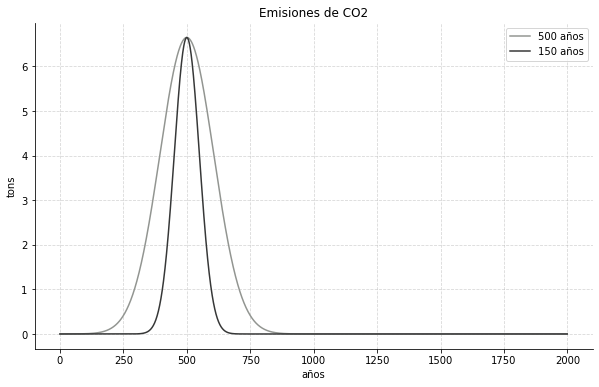

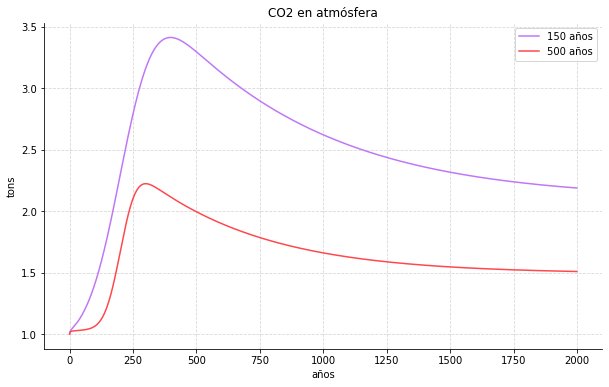

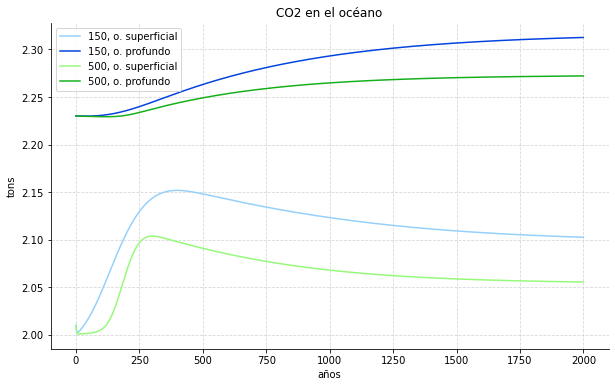

In [ ]:
def ff(x):
    #return ((1/(np.sqrt(2*np.pi)*0.075))*np.exp((-(x - 500)**2)/(70)**2))
    #return ((1/(np.sqrt(2*np.pi)*0.05))*np.exp((-(x - 500)**2)/(150)**2))
    #return ((1/(np.sqrt(2*np.pi)*0.06))*np.exp((-(x - 500)**2)/(70)**2))
    return ((1/(np.sqrt(2*np.pi)*0.06))*np.exp((-(x - 500)**2)/(150)**2))
    
def ff2(x):
    #return ((1/(np.sqrt(2*np.pi)*0.075))*np.exp((-(x - 500)**2)/(70)**2))
    #return ((1/(np.sqrt(2*np.pi)*0.05))*np.exp((-(x - 500)**2)/(150)**2))
    return ((1/(np.sqrt(2*np.pi)*0.06))*np.exp((-(x - 500)**2)/(70)**2))
    #return ((1/(np.sqrt(2*np.pi)*0.06))*np.exp((-(x - 500)**2)/(150)**2))
    
plt.figure(figsize=(10,6))
#plt.plot([i*h for i in range(len(lxo))],lxo, color='xkcd:light purple', label='CO2 en atmósfera')
plt.plot([i*h for i in range(len(lxo))],[ff(i*h) for i in range(len(lxo))], color='xkcd:grey', label='500 años')
plt.plot([i*h for i in range(len(lxo))],[ff2(i*h) for i in range(len(lxo))], color='xkcd:dark grey', label='150 años')
#plt.plot([i*h for i in range(len(lyo))],lyo, color='xkcd:light blue', label='CO2 en o. superficial')
#plt.plot([i*h for i in range(len(lzo))],lzo, color='xkcd:light green', label='CO2 en o. profundo')
plt.grid(alpha = 0.5, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Emisiones de CO2")
plt.xlabel("años")
plt.ylabel("tons")
plt.legend()
plt.savefig("fig-7c",dpi=300)
plt.show()

plt.figure(figsize=(10,6))
plt.plot([i*h for i in range(len(lxo))],lxo1, color='xkcd:light purple', label='150 años')
plt.plot([i*h for i in range(len(lxo))],lxo2, color='xkcd:light red', label='500 años')
plt.grid(alpha = 0.5, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("CO2 en atmósfera")
plt.xlabel("años")
plt.ylabel("tons")
plt.legend()
plt.savefig("fig-7a",dpi=300)
plt.show()

plt.figure(figsize=(10,6))
plt.plot([i*h for i in range(len(lyo))],lyo1, color='xkcd:light blue', label='150, o. superficial')
plt.plot([i*h for i in range(len(lzo))],lzo1, color='xkcd:blue', label='150, o. profundo')
plt.plot([i*h for i in range(len(lyo))],lyo2, color='xkcd:light green', label='500, o. superficial')
plt.plot([i*h for i in range(len(lzo))],lzo2, color='xkcd:green', label='500, o. profundo')
plt.grid(alpha = 0.5, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("CO2 en el océano")
plt.xlabel("años")
plt.ylabel("tons")
plt.legend()
plt.savefig("fig-7b",dpi=300)
plt.show()